In [2]:
library(dplyr)
library(ggplot2)

In [3]:
# mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D11/"
# mysuffix = "pool1_13_noddd_D11.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

# myfilename = paste0(mydir,mysuffix)
# df0 = read.table(myfilename, header = T)
# df0$treatment = 'NONE'
# head(df0)

In [4]:
# mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_13_noddd_D30/"
# mysuffix = "pool1_13_noddd_D30.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point.celltype_counts.tsv"

# myfilename = paste0(mydir,mysuffix)
# df1= read.table(myfilename, header = T)
# df1$celltype <- as.character(df1$celltype)
# df1$celltype[df1$celltype == "Astro"] <- "FPP"
# df1$celltype[df1$celltype == "CHem"] <- "U_Neur1"
# df1$celltype[df1$celltype == "unknown"] <- "U_Neur2"
# df1$treatment = 'NONE'
# head(df1)

In [114]:
mydir = "/nfs/leia/research/stegle/dseaton/hipsci/singlecell_neuroseq/data/data_processed/pool1_17_D52/"
mysuffix = "pool1_17_D52.scanpy.w_metadata.w_celltype.scanpy.obs_df.groupedby.donor_id-pool_id-time_point-treatment.celltype_counts.tsv"

myfilename = paste0(mydir,mysuffix)
df2 = read.table(myfilename, header = T)
df2$celltype <- as.character(df2$celltype)
df2$celltype[df2$celltype == "CHem"] <- "U_Neur1"
df2$celltype[df2$celltype == "unknown"] <- "U_Neur3"
head(df2)

donor_id,pool_id,time_point,treatment,celltype,n_cells
HPSI0114i-bezi_3,pool10,D52,NONE,Astro,2
HPSI0114i-bezi_3,pool10,D52,NONE,U_Neur1,5
HPSI0114i-bezi_3,pool10,D52,NONE,DA,66
HPSI0114i-bezi_3,pool10,D52,NONE,Epen1,39
HPSI0114i-bezi_3,pool10,D52,NONE,FPP,31
HPSI0114i-bezi_3,pool10,D52,NONE,P_FPP,4


In [115]:
# df2 = df2[df2$treatment == "NONE",]

In [116]:
df_tot_d52_mid = df2[df2$celltype %in% c("DA","Sert"),] %>% group_by(donor_id,pool_id) %>% 
                                                        summarize(total_midbrain_cells = sum(n_cells))
df_tot_d52_mid = df2[df2$celltype %in% c("DA"),] %>% group_by(donor_id,pool_id) %>% 
                                                        summarize(total_midbrain_cells = sum(n_cells))

In [117]:
nrow(df_tot_d52_mid)

[1] 229

In [118]:
df_tot_d52 = df2 %>% group_by(donor_id,pool_id) %>% summarize(total_cells = sum(n_cells))
nrow(df_tot_d52)

[1] 232

In [119]:
df = inner_join(df_tot_d52, df_tot_d52_mid, by = c("donor_id","pool_id"))
nrow(df)
head(df)

[1] 229

donor_id,pool_id,total_cells,total_midbrain_cells
HPSI0114i-bezi_3,pool10,393,103
HPSI0114i-eipl_1,pool1,25935,248
HPSI0114i-fikt_3,pool14,283,67
HPSI0114i-kolf_2,pool10,243,52
HPSI0114i-kolf_2,pool15,2423,883
HPSI0114i-lexy_2,pool10,453,76


In [120]:
df$diff_eff = df$total_midbrain_cells/df$total_cells
head(df)

donor_id,pool_id,total_cells,total_midbrain_cells,diff_eff
HPSI0114i-bezi_3,pool10,393,103,0.262086514
HPSI0114i-eipl_1,pool1,25935,248,0.009562367
HPSI0114i-fikt_3,pool14,283,67,0.236749117
HPSI0114i-kolf_2,pool10,243,52,0.213991770
HPSI0114i-kolf_2,pool15,2423,883,0.364424267
HPSI0114i-lexy_2,pool10,453,76,0.167770419


In [121]:
# install.packages("lme4")

In [122]:
library(lme4)
lmm <- lmer(diff_eff ~ (1 | donor_id) + (1 | pool_id), data = df, REML = F)

In [123]:
summary(lmm)

Linear mixed model fit by maximum likelihood  ['lmerMod']
Formula: diff_eff ~ (1 | donor_id) + (1 | pool_id)
   Data: df

     AIC      BIC   logLik deviance df.resid 
  -209.1   -195.4    108.6   -217.1      225 

Scaled residuals: 
     Min       1Q   Median       3Q      Max 
-2.14332 -0.40865 -0.06356  0.37349  1.83916 

Random effects:
 Groups   Name        Variance Std.Dev.
 donor_id (Intercept) 0.012872 0.11346 
 pool_id  (Intercept) 0.010199 0.10099 
 Residual             0.008072 0.08984 
Number of obs: 229, groups:  donor_id, 196; pool_id, 16

Fixed effects:
            Estimate Std. Error t value
(Intercept)  0.22162    0.02748   8.064

In [124]:
summary(lmm)$varcor$donor_id[1,1]
summary(lmm)$varcor$pool_id[1,1]
# summary(lmm)$Residual

[1] 0.01287209

[1] 0.01019945

In [125]:
# res = 0.01267 # DA+Sert
res = 0.008072 # DA only
# res = 0.016086 # DA+Sert, untreated cells only
# res = 0.01051 # DA only, untreated cells only
sum = summary(lmm)$varcor$donor_id[1,1]+summary(lmm)$varcor$pool_id[1,1]+res
donor = summary(lmm)$varcor$donor_id[1,1]/sum
pool = summary(lmm)$varcor$pool_id[1,1]/sum
residual = res/sum

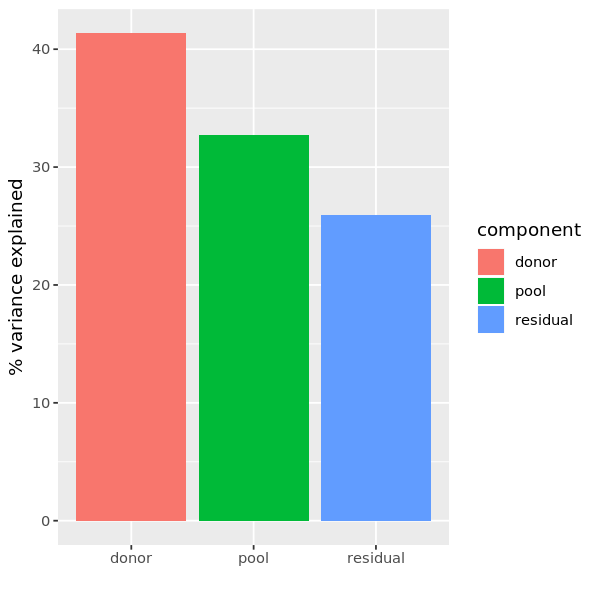

In [126]:
options(repr.plot.width = 5, repr.plot.height = 5)
df = data.frame(component = c("donor","pool","residual"),
               variance = c(donor,pool, residual))
p = ggplot(df, aes(x = component, y = variance*100, fill = component)) + geom_bar(stat="identity")
p + xlab("") + ylab("% variance explained")

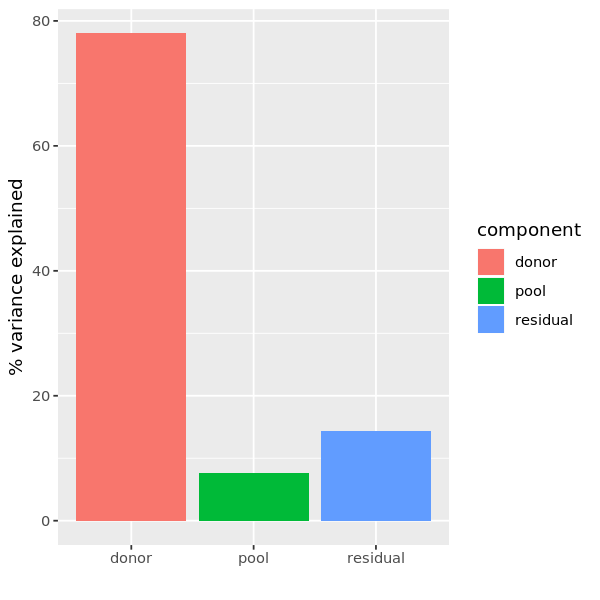

In [80]:
options(repr.plot.width = 5, repr.plot.height = 5)
df = data.frame(component = c("donor","pool","residual"),
               variance = c(donor,pool, residual))
p = ggplot(df, aes(x = component, y = variance*100, fill = component)) + geom_bar(stat="identity")
p + xlab("") + ylab("% variance explained")

In [44]:
str(summary(lmm))

List of 18
 $ methTitle   : chr "Linear mixed model fit by maximum likelihood "
 $ objClass    : chr "lmerMod"
  ..- attr(*, "package")= chr "lme4"
 $ devcomp     :List of 2
  ..$ cmp : Named num [1:10] 402.68 2.69 0.71 2.2 2.91 ...
  .. ..- attr(*, "names")= chr [1:10] "ldL2" "ldRX2" "wrss" "ussq" ...
  ..$ dims: Named int [1:12] 230 230 1 229 213 2 1 2 0 0 ...
  .. ..- attr(*, "names")= chr [1:12] "N" "n" "p" "nmp" ...
 $ isLmer      : logi TRUE
 $ useScale    : logi TRUE
 $ logLik      :Class 'logLik' : -25 (df=4)
 $ family      : NULL
 $ link        : NULL
 $ ngrps       : Named num [1:2] 197 16
  ..- attr(*, "names")= chr [1:2] "donor_id" "pool_id"
 $ coefficients: num [1, 1:3] 0.4996 0.0293 17.0769
  ..- attr(*, "dimnames")=List of 2
  .. ..$ : chr "(Intercept)"
  .. ..$ : chr [1:3] "Estimate" "Std. Error" "t value"
 $ sigma       : num 0.113
 $ vcov        :Formal class 'dpoMatrix' [package "Matrix"] with 5 slots
  .. ..@ x       : num 0.000856
  .. ..@ Dim     : int [1:2] 1 1
 

In [ ]:
# coxme::lmekin(df$diff_eff ~ (1|as.matrix(df$donor_id))+ (1|as.matrix(df$pool_id)))

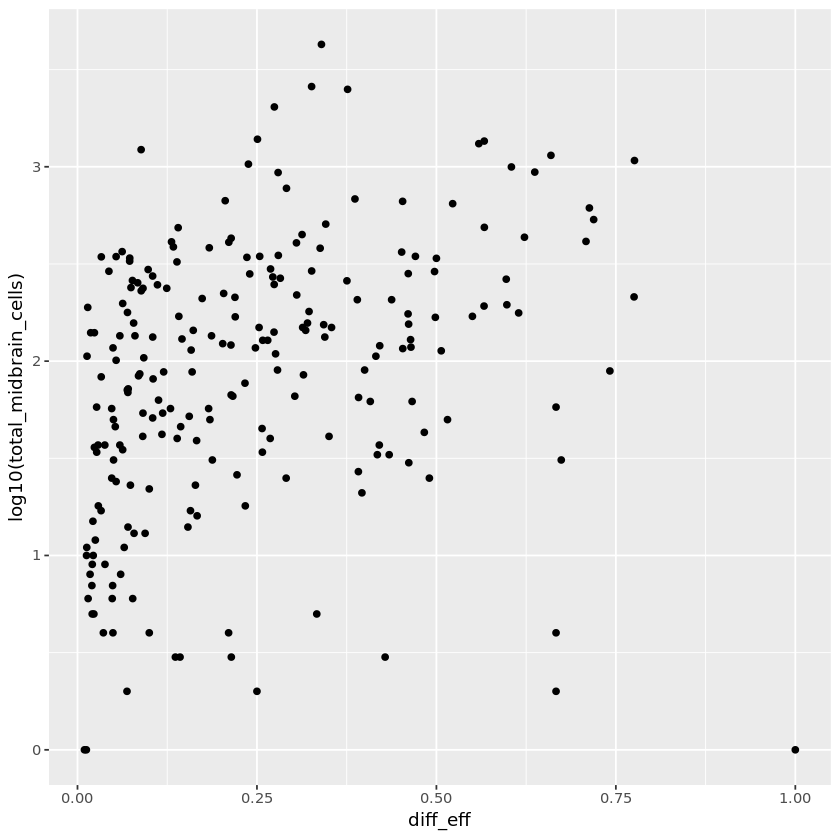

In [65]:
ggplot(df, aes(x=diff_eff, y = log10(total_midbrain_cells)))+ geom_point()

In [56]:
# df_donor = df %>% group_by(donor_id) %>% summarize(avg_de1 = mean(diff_eff))  # D52 DA+Sert ROT+NONE
# df_donor2 = df %>% group_by(donor_id) %>% summarize(avg_de2 = mean(diff_eff)) # D52 DA+Sert NONE
# df_donor3 = df %>% group_by(donor_id) %>% summarize(avg_de3 = mean(diff_eff))  # D52 DA ROT+NONE
df_donor4 = df %>% group_by(donor_id) %>% summarize(avg_de4 = mean(diff_eff))  # D52 DA NONE

In [57]:
# head(df_donor)
# head(df_donor2)

In [58]:
df_donor_compare = inner_join(df_donor,df_donor2)
head(df_donor_compare)

Joining, by = "donor_id"


donor_id,avg_de,avg_de2
HPSI0114i-bezi_3,0.58269720,0.6146789
HPSI0114i-eipl_1,0.01287835,0.0174524
HPSI0114i-fikt_3,0.40282686,0.4444444
HPSI0114i-kolf_2,0.47059133,0.4617184
HPSI0114i-lexy_2,0.72690535,0.7296414
HPSI0114i-posc_1,0.81349206,0.8289474


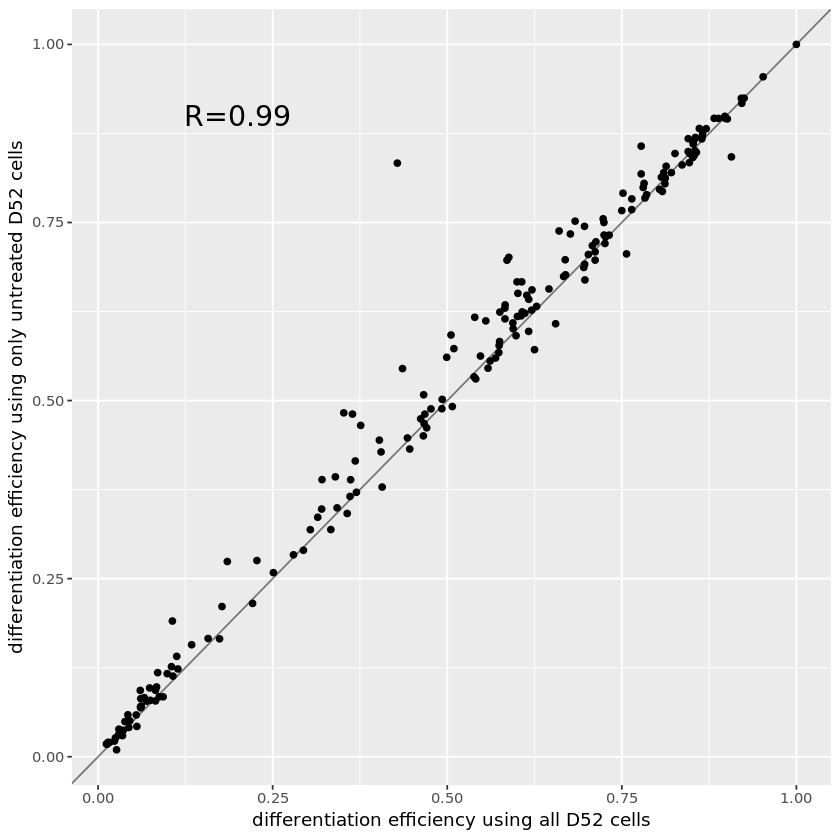

In [67]:
r = cor(df_donor_compare$avg_de,df_donor_compare$avg_de2)
ggplot(df_donor_compare, aes(x=avg_de,y=avg_de2)) + geom_point() + 
    xlab("differentiation efficiency using all D52 cells") + 
    ylab("differentiation efficiency using only untreated D52 cells") +
    annotate("text",x = 0.2,y=0.9,label=paste0("R=",round(r,digits =2)),size =6) +
    geom_abline(intercept = 0, alpha = 0.5)

In [46]:
df_donor_compare2 = inner_join(df_donor_compare,df_donor3)

Joining, by = "donor_id"


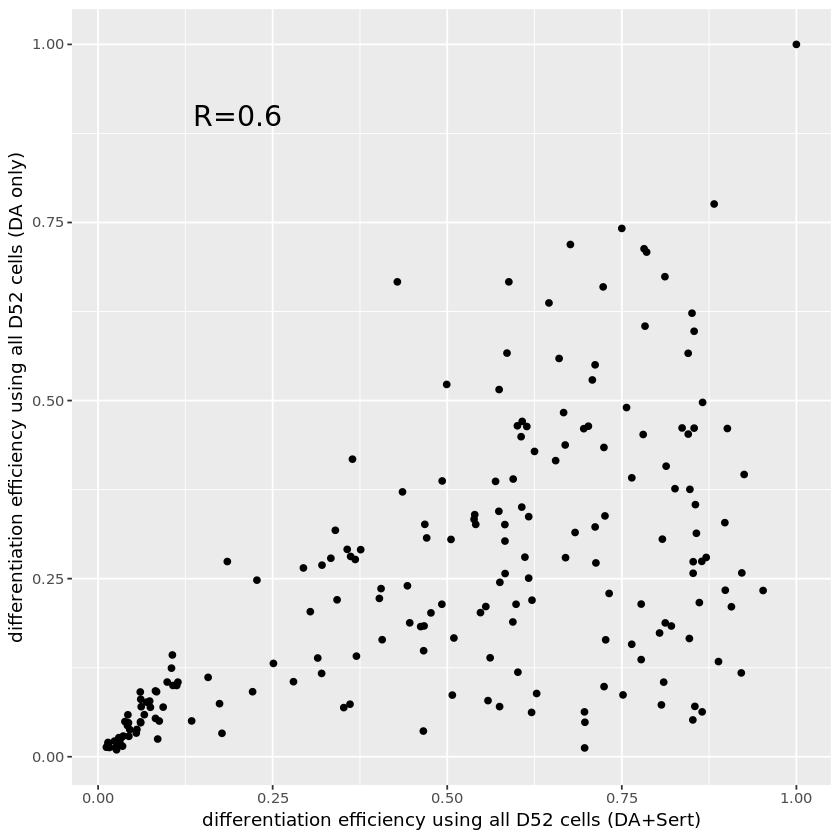

In [48]:
r = cor(df_donor_compare2$avg_de,df_donor_compare2$avg_de3)
ggplot(df_donor_compare2, aes(x=avg_de,y=avg_de3)) + geom_point() + 
    xlab("differentiation efficiency using all D52 cells (DA+Sert)") + 
    ylab("differentiation efficiency using all D52 cells (DA only)") +
    annotate("text",x = 0.2,y=0.9,label=paste0("R=",round(r,digits =2)),size =6)

In [59]:
df_donor_compare3 = inner_join(df_donor_compare2,df_donor4)

Joining, by = "donor_id"


In [61]:
head(df_donor_compare3)

donor_id,avg_de,avg_de2,avg_de3,avg_de4
HPSI0114i-bezi_3,0.58269720,0.6146789,0.30275229,0.30275229
HPSI0114i-eipl_1,0.01287835,0.0174524,0.01427924,0.01427924
HPSI0114i-fikt_3,0.40282686,0.4444444,0.22222222,0.22222222
HPSI0114i-kolf_2,0.47059133,0.4617184,0.30714770,0.30714770
HPSI0114i-lexy_2,0.72690535,0.7296414,0.16412592,0.16412592
HPSI0114i-posc_1,0.81349206,0.8289474,0.40789474,0.40789474


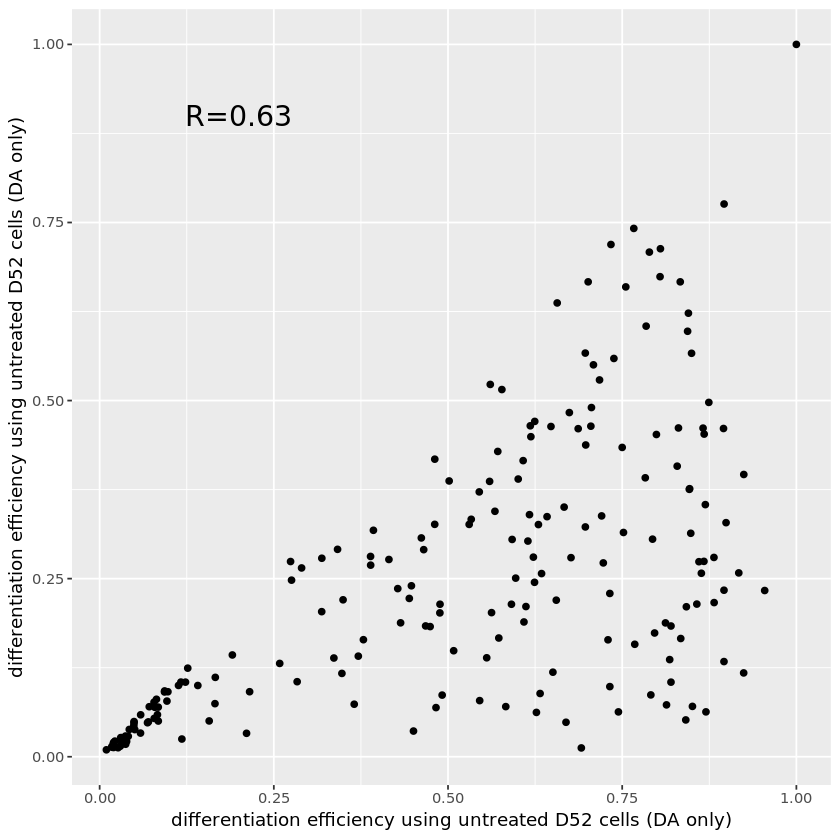

In [62]:
r = cor(df_donor_compare3$avg_de2,df_donor_compare3$avg_de4)
ggplot(df_donor_compare3, aes(x=avg_de2,y=avg_de4)) + geom_point() + 
    xlab("differentiation efficiency using untreated D52 cells (DA only)") + 
    ylab("differentiation efficiency using untreated D52 cells (DA only)") +
    annotate("text",x = 0.2,y=0.9,label=paste0("R=",round(r,digits =2)),size =6)